In [285]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from scipy.integrate import solve_ivp
from sklearn.decomposition import PCA

In [286]:
def lorenz(x, y, z, s=10, r=28, b=8.0/3.0):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot



In [287]:

dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (10., 10., 10.)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)




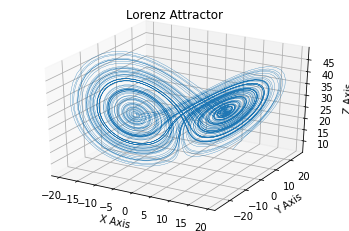

In [288]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.3)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.savefig("lorenz_normal")
plt.show()

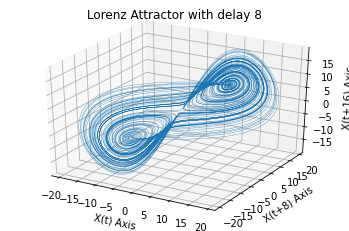

In [289]:
# Plot
delay_x = 8
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs[:-delay_x*2],xs[delay_x:-delay_x] , xs[delay_x*2:], lw=0.3)
ax.set_xlabel("X(t) Axis")
ax.set_ylabel(f"X(t+{delay_x}) Axis")
ax.set_zlabel(f"X(t+{delay_x*2}) Axis")
ax.set_title(f"Lorenz Attractor with delay {delay_x}")
plt.savefig(f"lorenz_x_delay_{delay_x}")
plt.show()

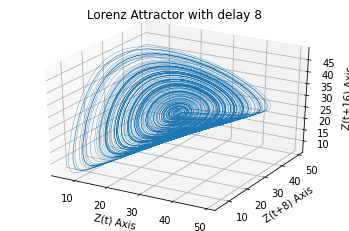

In [290]:
# Plot
delay_z = 8
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(zs[:-delay_z*2],zs[delay_z:-delay_z] , zs[delay_z*2:], lw=0.3)
ax.set_xlabel("Z(t) Axis")
ax.set_ylabel(f"Z(t+{delay_z}) Axis")
ax.set_zlabel(f"Z(t+{delay_z*2}) Axis")
ax.set_title(f"Lorenz Attractor with delay {delay_z}")
plt.savefig(f"lorenz_z_delay_{delay_x}")
plt.show()

In [291]:
# t = np.arange(0,len(xs[:-delay_x*2]))
# x_v = solve_ivp(t, xs[:-delay_x*2]) 
# x_d_v = solve_ivp(t, xs[delay:-delay_x]) 
# x_2d_v = solve_ivp(t, xs[delay_x*2:]) 

In [292]:
takens = np.loadtxt("takens_1.txt")

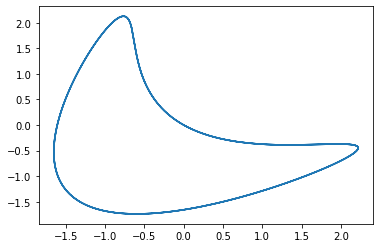

In [293]:
takens
plt.plot(takens[:,0],takens[:,1])
plt.savefig("takens_normal")

In [294]:
x = takens[:,0]
y = takens[:,1]

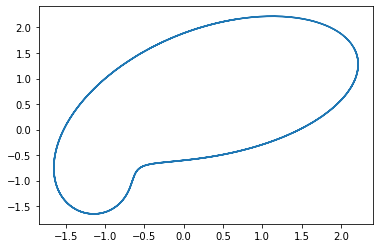

In [295]:
delay = 40

plt.plot(x[:-delay],x[delay:])
plt.savefig(f"2d_t_del_{delay}")
plt.show()

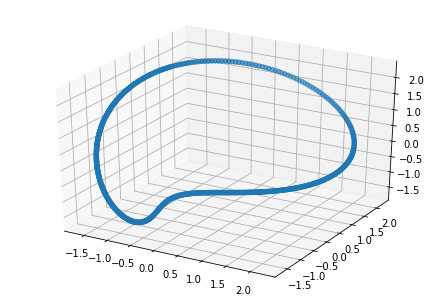

In [296]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:-delay*2],x[delay:-delay],x[delay*2:])
plt.savefig(f"3d_t_del_{delay}")
plt.show()

In [297]:
mi_ts = np.loadtxt("MI_timesteps.txt",  skiprows=1)

In [298]:
tmp = mi_ts[:,1:4]
pre_PCA = []

In [299]:
len(tmp)

15001

In [300]:
delay = 1
for i in range(len(tmp) - 351):
    delayed = tmp[i:351*delay+i:delay,:]
    delayed.flatten()
    pre_PCA.append(delayed.flatten())

In [301]:
pre_PCA = numpy.array(pre_PCA)

In [302]:
pca = PCA(n_components=3)

In [303]:
pca.fit(pre_PCA)

PCA(n_components=3)

In [304]:
transposed_pca = pca.components_.T

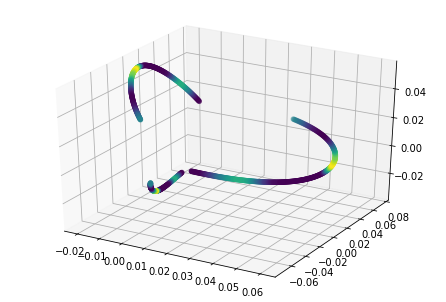

In [313]:
number_ = 9
fifth_col = mi_ts[:, number_]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(transposed_pca[:,0],transposed_pca[:,1],transposed_pca[:,2], c=fifth_col[:len(transposed_pca)])
ax.set_title(f"Colored respect to column {delay_x}")
plt.savefig(f"pca_res_{number_}")
plt.show()